In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
rng = np.random.default_rng(42)
scores = rng.integers(low=50, high=101, size=(4, 4))

In [3]:
row_means = scores.mean(axis=1)
col_means = scores.mean(axis=0)

In [4]:
global_mean = scores.mean()
global_std = scores.std()
global_var = scores.var()

row_std = scores.std(axis=1)
col_std = scores.std(axis=0)

row_var = scores.var(axis=1)
col_var = scores.var(axis=0)

In [5]:
global_max = scores.max()
global_min = scores.min()

max_flat_index = scores.argmax()
min_flat_index = scores.argmin()
max_rc = np.unravel_index(max_flat_index, scores.shape)
min_rc = np.unravel_index(min_flat_index, scores.shape)

In [6]:
df = pd.DataFrame(scores, columns=[f"Test{j+1}" for j in range(scores.shape[1])])
df["Row Mean"] = row_means.round(2)

col_means_series = pd.Series(list(col_means) + [np.nan], index=df.columns, name="Col Mean").round(2)
df_with_col_means = pd.concat([df, pd.DataFrame([col_means_series])], ignore_index=True)

print("=== 4x4 Test Scores Statistical Summary ===")
print("Scores Array:\n", scores)
print("\nRow-wise Means:", np.round(row_means, 2))
print("Column-wise Means:", np.round(col_means, 2))
print("\nGlobal Mean:", round(global_mean, 2))
print("Global Std:", round(global_std, 2))
print("Global Var:", round(global_var, 2))
print("\nRow-wise Std:", np.round(row_std, 2))
print("Column-wise Std:", np.round(col_std, 2))
print("Row-wise Var:", np.round(row_var, 2))
print("Column-wise Var:", np.round(col_var, 2))
print("\nGlobal Max:", global_max, "at index (row, col) =", max_rc)
print("Global Min:", global_min, "at index (row, col) =", min_rc)


=== 4x4 Test Scores Statistical Summary ===
Scores Array:
 [[54 89 83 72]
 [72 93 54 85]
 [60 54 76 99]
 [87 88 86 90]]

Row-wise Means: [74.5  76.   72.25 87.75]
Column-wise Means: [68.25 81.   74.75 86.5 ]

Global Mean: 77.62
Global Std: 14.53
Global Var: 210.98

Row-wise Std: [13.31 14.75 17.41  1.48]
Column-wise Std: [12.62 15.7  12.52  9.76]
Row-wise Var: [177.25 217.5  303.19   2.19]
Column-wise Var: [159.19 246.5  156.69  95.25]

Global Max: 99 at index (row, col) = (np.int64(2), np.int64(3))
Global Min: 54 at index (row, col) = (np.int64(0), np.int64(0))


In [7]:
df_with_col_means.to_csv("test_scores_4x4.csv", index=False)

In [8]:
report_lines = []
report_lines.append("=== 4x4 Test Scores Statistical Summary ===")
report_lines.append(f"Scores Array:\n{scores}")
report_lines.append("")
report_lines.append(f"Row-wise Means: {np.round(row_means, 2)}")
report_lines.append(f"Column-wise Means: {np.round(col_means, 2)}")
report_lines.append("")
report_lines.append(f"Global Mean: {global_mean:.2f}")
report_lines.append(f"Global Std (ddof=0): {global_std:.2f}")
report_lines.append(f"Global Var (ddof=0): {global_var:.2f}")
report_lines.append("")
report_lines.append(f"Row-wise Std: {np.round(row_std, 2)}")
report_lines.append(f"Column-wise Std: {np.round(col_std, 2)}")
report_lines.append(f"Row-wise Var: {np.round(row_var, 2)}")
report_lines.append(f"Column-wise Var: {np.round(col_var, 2)}")
report_lines.append("")
report_lines.append(f"Global Max: {global_max} at index (row, col) = {max_rc}")
report_lines.append(f"Global Min: {global_min} at index (row, col) = {min_rc}")

with open("test_scores_summary.txt", "w") as f:
    f.write("\n".join(report_lines))

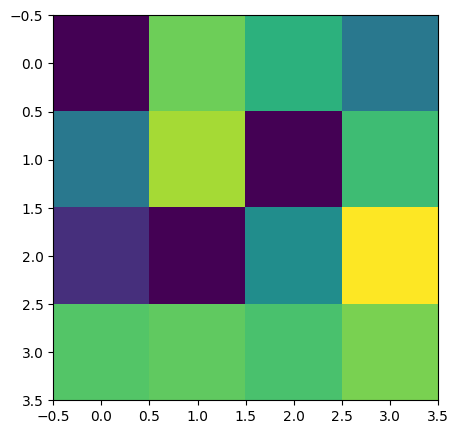

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(scores)

In [10]:
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        ax.text(j, i, str(scores[i, j]), ha="center", va="center")

In [11]:
ax.scatter([max_rc[1]], [max_rc[0]], marker="o", s=120, facecolors="none", edgecolors="black", linewidths=2)
ax.scatter([min_rc[1]], [min_rc[0]], marker="s", s=120, facecolors="none", edgecolors="black", linewidths=2)

ax.set_xticks(range(scores.shape[1]))
ax.set_yticks(range(scores.shape[0]))
ax.set_xticklabels([f"Test{j+1}" for j in range(scores.shape[1])])
ax.set_yticklabels([f"Stu{i+1}" for i in range(scores.shape[0])])
ax.set_title("4x4 Test Scores Heatmap (circle=max, square=min)")
plt.tight_layout()
plt.savefig("test_scores_heatmap.png", dpi=200)
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
metrics = {
    "scores": scores.tolist(),
    "row_means": np.round(row_means, 2).tolist(),
    "col_means": np.round(col_means, 2).tolist(),
    "global": {"mean": float(global_mean), "std": float(global_std), "var": float(global_var)},
    "global_max": {"value": int(global_max), "index": [int(x) for x in max_rc]},
    "global_min": {"value": int(global_min), "index": [int(x) for x in min_rc]},
}
with open("test_scores_metrics.json", "w") as jf:
    json.dump(metrics, jf, indent=2)